#Introduction
Proper weather prediction is essential in many sectors, such as agriculture, aviation, and transport, among others, as well as in daily routines (Driga, and Drigas, 2019). Knowing and being able to predict weather patterns could help during a planning process or in decision-making to avoid risks involved with bad weather. This project uses data mining techniques to classify weather types using a rich dataset of meteorological parameters.

#About the Dataset
The project uses a dataset containing precise information on the weather. Numerical features are represented by temperature, humidity, wind speed, precipitation, and atmospheric pressure. Categorical features represent cloudiness, season, and location. The dataset is collected from the following source: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

#Project Objective and Scope
The main task within the project is to train a sort classification model that can adequately recognize the type of weather by its features. There are many critical steps involved in this project such as, Data preprocessing, which manages missing values and encodes categorical variables.

Exploratory data analysis for insight into the relationship and distributions.

Model building, evaluation with different classification algorithms.

fine-tuning of the best performing one for its accuracy.

Results from this project provide critical insights into what determines various weather types and turn out very helpful in coming up with improved models for weather prediction.

#Data Pre-processing
Data preprocessing is the most significant step in preparing a dataset for analysis and the building of a model (Alexandropoulos et al., 2019). This constitutes cleaning the data, handling missing values, encoding categorical variables, and normalizing numerical features. In this section, such activities are done to preprocess the weather dataset.

##Load the Dataset
First of all, the dataset is loaded with the help of pandas DataFrame. This step is performed to evaluate the structure and the content present  inside the dataset in the form of variables.

In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/weather_classification_data.csv')

# Display the first few rows of the dataset to inspect its structure
df.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


##Checking missing values
Handling missing values is an integral part of Data preprocessing (Emmanuel et al., 2021). This step checks for the missing part of the data. Therefore, for the selected dataset, missing values are checked as follows:

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

From the above result it is observed that there are no missing values in the dataset.

##Encode categorical Variables
The selected dataset has categorical variables like cloud cover, season, location, and weather type. All of these have to be encoded into numerical format so that they can be used in the case of machine learning models. In this respect, LabelEncoder from scikit-learn is used. Encoding categorical variables proves to be an important step of data pre-processing as it helps to convert all the data in the single form (Hancock and Khoshgoftaar, 2020).

In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical variables
df['Cloud Cover'] = label_encoder.fit_transform(df['Cloud Cover'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Weather Type'] = label_encoder.fit_transform(df['Weather Type'])

# Display the first few rows to check the encoding
df.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


As it can be seen from the above table that catrgorical variables like cloud cover, location and weather type are converted into numerical variable.

##Normalize Numerical Variables
Numerical features need to be normalized so that all of them are on a similar scale for the performance of the machine learning algorithms (Ahsan et al., 2021). In this research, StandardScaler from sci-kit-learn is used to normalize numerical variables.

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the standard scaler
scaler = StandardScaler()

# List of numerical columns to be scaled
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                  'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Apply the scaler to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows to check the normalization
df.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-0.294931,0.212404,-0.048086,0.887629,3,0.134203,-0.520104,3,-0.582231,1,1
1,1.143035,1.351385,-0.192836,0.543291,3,0.150602,0.776424,1,1.345768,1,0
2,0.625367,-0.233285,-0.409962,-1.178401,0,0.346579,0.257813,1,0.010999,2,3
3,1.085516,0.707613,-1.206089,0.887629,0,0.549008,0.776424,1,-1.323769,0,3
4,0.452811,0.261924,1.037543,0.386773,2,-0.407490,-0.779410,3,-0.878846,2,1


the above result shows that all numerical variables have been normalized. Now, the values will be standardized on each feature with a mean of 0 and a standard deviation of 1 so they are all on a similar scale.

#Exploratory Data Analysis
One of the critical steps in understanding underlying patterns, relationships, and distributions is exploratory data analysis (EDA) (Wongsuphasawat et al., 2019). It visualizes the data to give insights that inform later modeling steps.



##Visualizing the Distribution of Features

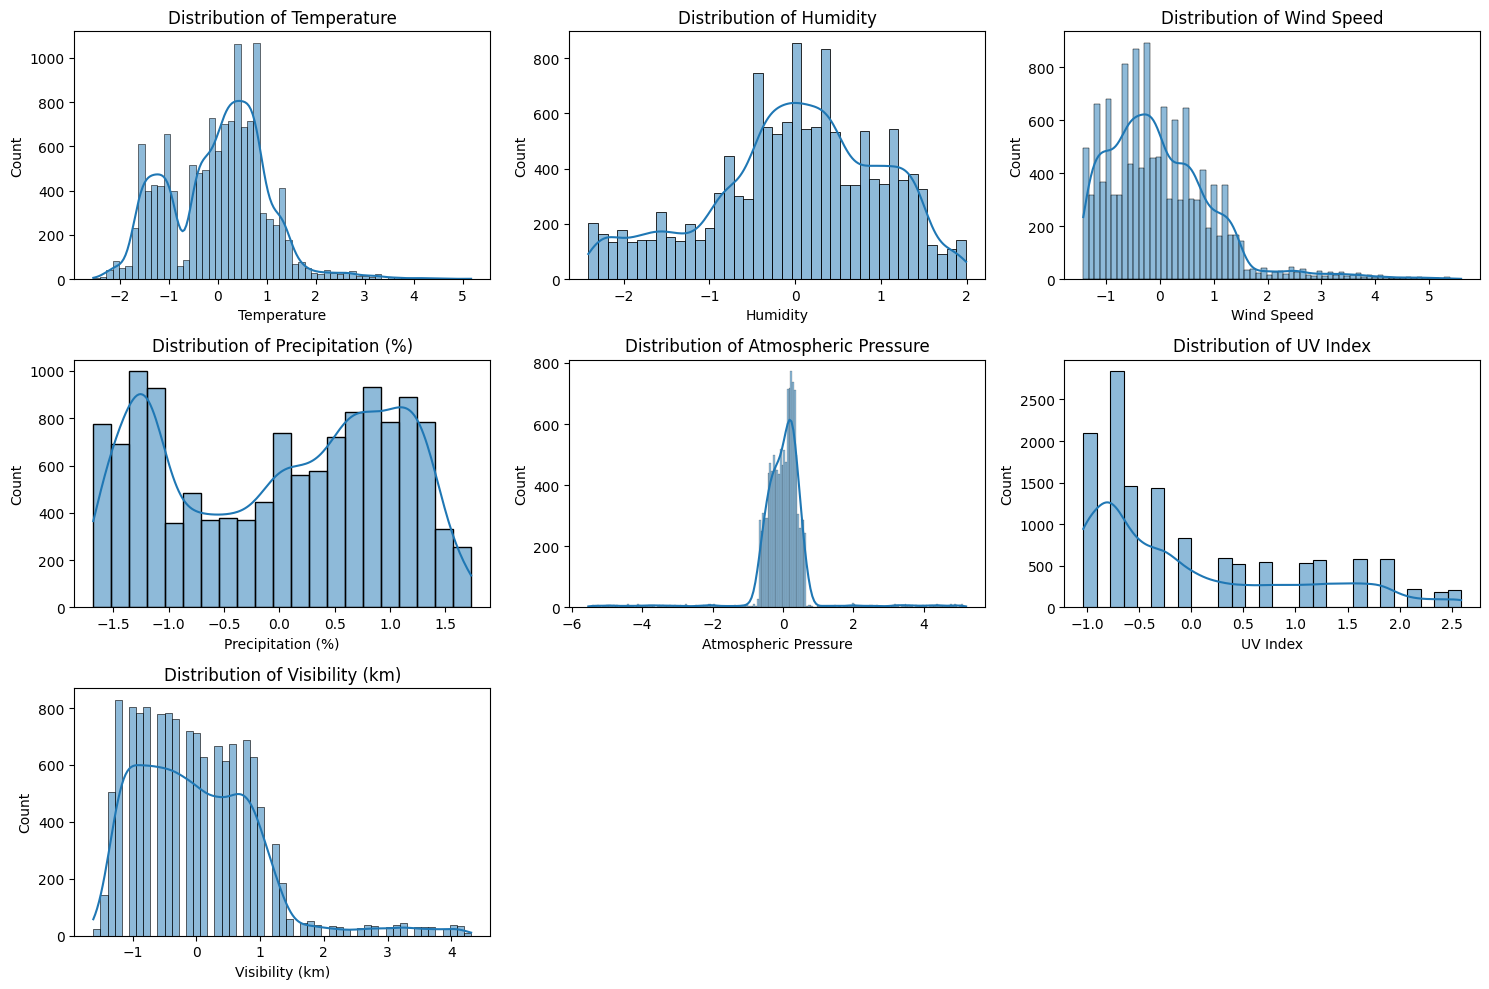

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot distribution for each numerical feature
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


###Distribution of Temperature
The histogram with a kernel density estimate involving the Temperature feature comes out multimodal, with various distinct peaks. This suggests that the dataset includes temperatures from different distributions or clusters; the prominent peaks are around -1 and 0, indicating these ranges as being the most frequent in the data. Temperature values range approximately from -2.5 to 5, although there are a large number of points focused around the central values, indicating that these temperatures come up most often. The distribution is also slightly right-skewed, suggesting there might be some higher values for temperature extending further to the right. This KDE plot highlights the density peaks, confirming the multi-modal nature of this distribution. These observations further show that temperature is a vital feature that might interact with other variables in the formation of distinct weather patterns and, therefore, form a crucial step for any subsequent modeling process.


###Distribution of Humidity
Humidity showcases a relatively flat distribution, with a peak at 0, indicating that the most average humidity value occurs. The spread is from around –2 to 2, with a slight right skew. Overall, it means a fair representation of most other levels of humidity.

###Distribution of Wind Speed
Wind speed is right-skewed, peaked near –1, indicating most values are lower wind speeds. The range went from –1 to about 5 with many observations of low wind speed. This skewness indicates that the bulk of data represents calmer weather conditions.

###Distribution of Precipitation (%)
The precipitation distribution is close to being uniform with multiple peaks, which tells of different levels of precipitation. The range is approximately from -1.5 to 1.5 thus it has a balanced representation across different percentages of rainfall. This suggests diverse weather conditions ranging from dry to wet.

###Distribution of Atmospheric Pressure
The atmospheric pressure ranges tightly around 0 with a sharp peak, showing little variability. The range is narrow from -6 to 4, indicating that most of the pressure readings are relatively close to the mean. Hence, there is evidence of relatively consistent conditions of atmospheric pressure.

###Distribution of UV Index
The UV Index distribution is highly skewed to the right and peaks at -0.5; thus, shallow values in the UV Index are pretty prevalent. It ranges from -1 to 2.5 and has a declining frequency as it rises. This means that higher UV conditions are less frequent in the dataset.

###Distribution of Visibility (km)
The visibility follows a left-skewed distribution, peaking between -0.5 and 0, indicating that most values are within the lower to modest range. The range ranges from -1 to 4, but few cases have higher levels of visibility. This means that moderate visibility dominates.




##Coorelation Matrix
The correlation matrix helps get insights into how various numerical features are linearly related to each other.

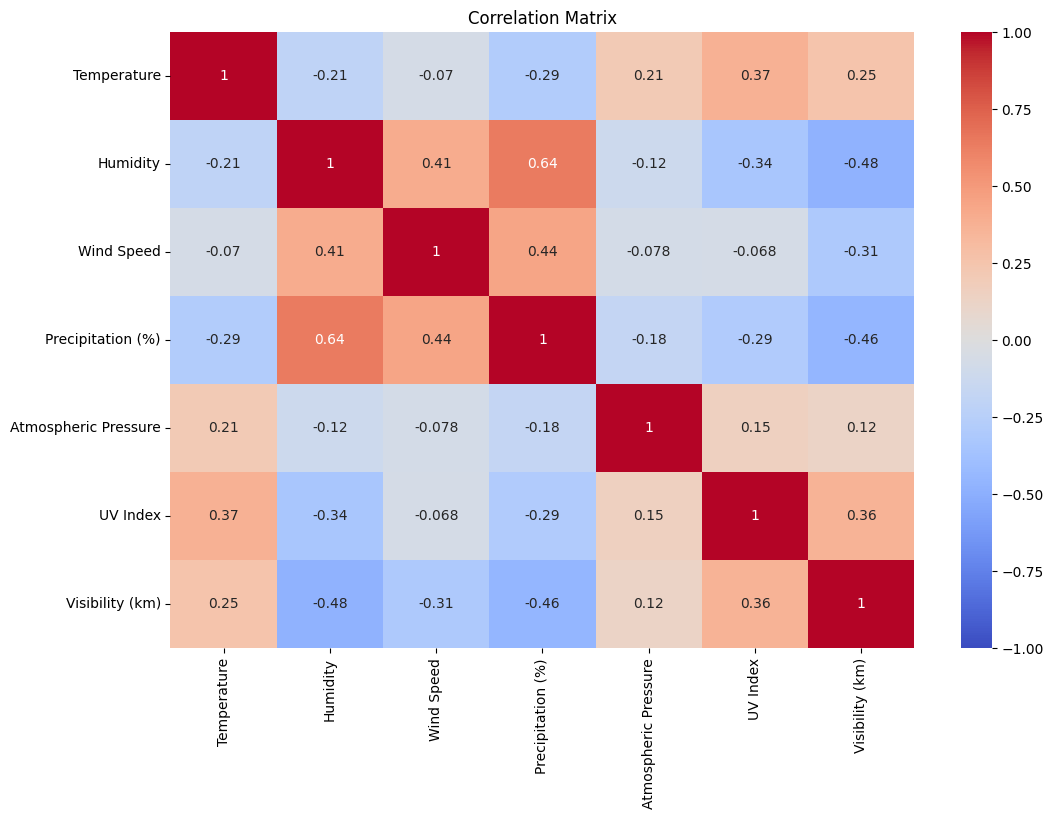

In [6]:
# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


The correlation matrix is helpful in deriving insights into how various numerical features are linearly related to one another. The following is the heatmap display of the correlation matrix, making transparently clear how strong and in which ways the relationships are. In particular, Precipitation is strongly correlated with humidity, while Temperature, UV Index, and Visibility are negatively correlated. That means high humidity combines high precipitation and low temperature, UV index, and visibility. Wind Speed weakly relates positively to Humidity and Precipitation, tending to mean that with increasing winds comes higher relative humidity and precipitation. It also shows a moderate negative correlation with Visibility, meaning solid winds distort visibility. Apart from its strong relation to Humidity, precipitation also relates moderately to the variables of wind speed and rather inversely to Visibility, indicating that more significant precipitation would be commonly found paired with higher wind speeds and reduced visibility. Atmospheric Pressure is positively correlated with both Temperature and UV Index, thus indicating that the higher the atmospheric pressure, the higher the temperature and UV. The UV Index moderately positively relates to Temperature and Visibility. In contrast, it is negatively associated with Humidity, hence indicating that higher UV levels are linked to higher temperatures and visibility but at a lower level of humidity. There is a negative correlation of visibility with humidity and precipitation; high visibilities are, therefore often linked to lower humidities and weaker precipitation. These insights help understand the interdependencies between features, hence guiding principles for building the model.



##Visualizing key relationships
Visualizing key relationships between differnet variable is a crucial part of data analysis.



###Scatter Plot: Temperature vs Humidity

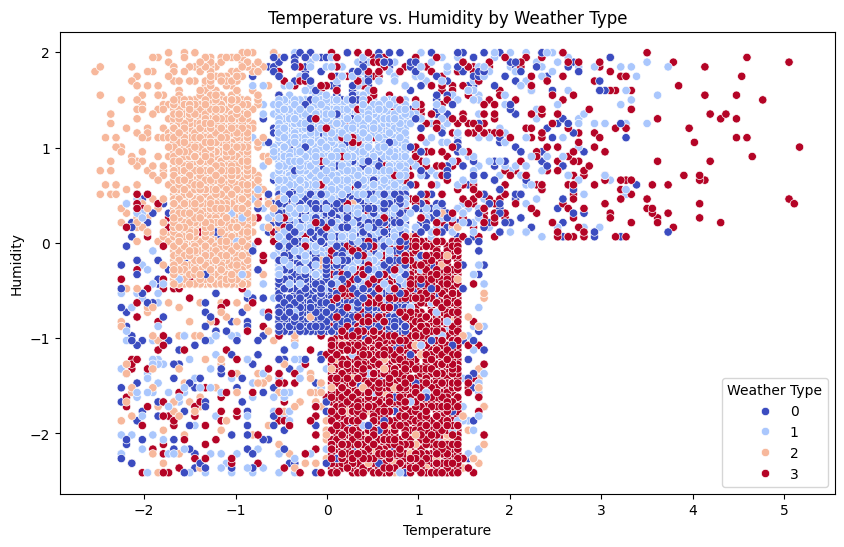

In [7]:
# Scatter plot of Temperature vs. Humidity colored by Weather Type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Humidity', hue='Weather Type', palette='coolwarm')
plt.title('Temperature vs. Humidity by Weather Type')
plt.show()


This scatter plot of Temperature vs. Humidity, colored by Weather Type, clearly shows distinct clusters for the three weather types. In the plot, Weather Types 0 and 1 are dark and light blue, respectively; they remain within a specific temperature and humidity range, proving that these variables are related to weather conditions. High temperatures and low humidity levels corresponded to the red dots, indicating Weather Type 3, while high temperatures with high humidity levels corresponded to the peach color, which is Weather Type 2.
This plot clearly shows that temperature and humidity are strong drivers of weather classification based on the separation of weather types concerning these features. It infers that temperature and humidity are strong predictors of weather type and would form essential features in our classification models.

###Box Plot: Wind Speed by weather type

<ipython-input-8-1d39cf0f4ab1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weather Type', y='Wind Speed', palette='coolwarm')


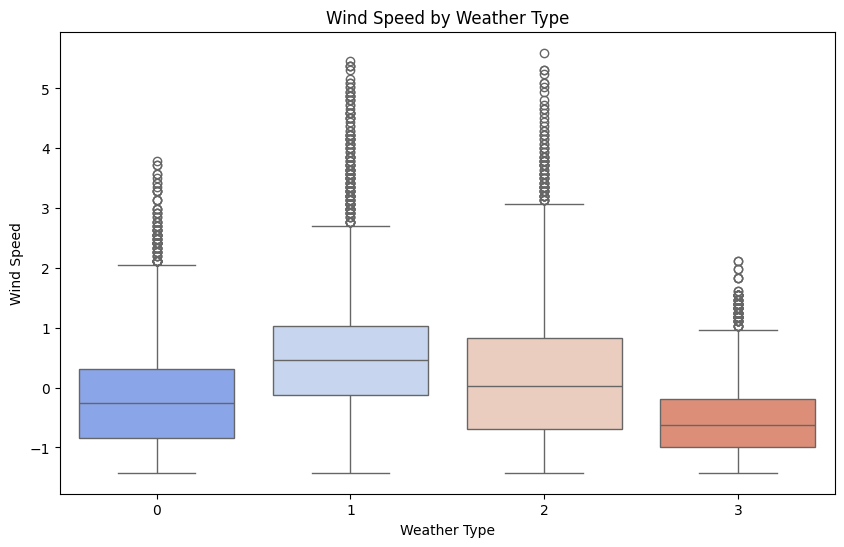

In [8]:
# Box plot of Wind Speed by Weather Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Weather Type', y='Wind Speed', palette='coolwarm')
plt.title('Wind Speed by Weather Type')
plt.show()


It is observed that the box plot of Wind Speed by Weather Type presents a different distribution. Weather Type 0 – Median wind speed of about 0, IQR -0.5 to 1, outliers to 2. Weather Type 1 – a slightly higher median of 0.5, IQR 0 to 1.5, and outliers out to 3. Weather Type 2 also presents a median of 0.5 with the highest dispersion, with IQR values of 0 up to 1.5 and outliers up to 5. Weather Type 3 probably has the lowest median wind speed at about -0.5, and most of the data is clustered around -1 to 0, with very few outliers. These wind speed variations emphasize the segregating role of this parameter among weather types, where Weather Type 3 was associated with relatively low speeds, and Weather Type 2 was characterized by significant variability.



#Classification

##Splitting the data into training and testing datasets

In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((9240, 10), (3960, 10), (9240,), (3960,))

##Applying Classification Algorithms

In this section, multiple classification algorithms are applied and evaluated to predict weather types based on the preprocessed dataset. Three different classifiers are used: Decision Tree, Random Forest, and Support Vector Machine (SVM). After evaluating their performance,  the best-performing model is fine tuned for optimal results.



###Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the classifier
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier
Accuracy: 0.901010101010101
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       955
           1       0.90      0.89      0.89       982
           2       0.93      0.93      0.93      1033
           3       0.89      0.91      0.90       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



The dataset was trained on a Decision Tree Classifier and run upon. The model returned an accuracy of 90.1%. The precision, recall, and F1-score for the various weather types lay between 0.88 and 0.93, thus very high, showing that the model worked well-respecting variances within the different weathers.


###Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 0.9113636363636364
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       955
           1       0.89      0.92      0.90       982
           2       0.93      0.93      0.93      1033
           3       0.94      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



Compared to the decision tree, the Random Forest Classifier performed better with an accuracy of 91.1%. In the case of different kinds of weather, all of them fell within a range of precision, recall, and F1 score from 0.88 to 0.94. This increase in performance indicates that ensemble methods like this, of combining multiple trees, are helpful against overfitting and toward improving generalization.

###Support Vector Machine (SVM) Classifier

In [12]:
from sklearn.svm import SVC

# Initialize the classifier
svm_classifier = SVC(random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the classifier
print("Support Vector Machine Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Classifier
Accuracy: 0.9032828282828282
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       955
           1       0.89      0.91      0.90       982
           2       0.93      0.94      0.93      1033
           3       0.93      0.88      0.90       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



The SVM classifier performed well, with an accuracy of 90.3%. Precisions, recalls, and F1 scores ranged individually for each type of weather from 0.86 to 0.93. This proves that SVM works perfectly on complex decision boundaries among classes for various kinds of weather.



##Fine Tuning of the best classifier model (Random Forest)

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the Random Forest with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf_classifier.predict(X_test)

# Evaluate the classifier
print("Best Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Random Forest Classifier
Accuracy: 0.9103535353535354
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       955
           1       0.90      0.92      0.91       982
           2       0.93      0.94      0.93      1033
           3       0.95      0.89      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



Since the Random Forest Classifier performed better, the model is further tuned using GridSearchCV for optimal hyperparameters. The fine-tuned random forests obtained an accuracy of 91.0%. Precision, recall, and F1-scores lie in the ranges 0.86-0.95. It has shown slightly improved performance and proves that the Random Forest model is robust regarding weather type prediction.


#Conclusion and Recommendations
In this project, classification models are developed and their performances are evaluated in terms of weather type based on a complete set of meteorological features. At present, during data preprocessing,missing values are handled,  categorical variables are encoded, and numerical features are normalized. EDA informed us about some of the distributions and relationships within the data that turned out to be helpful while developing models. On testing the models, it is found that the random forest classifier fared the best with an accuracy of 91.1%, further tuned to 91.0%. This agreed very well in precision, recall, and F1-scores across different weather conditions for this model, giving its robustness and reliability.
From the analysis and evaluation of the models,it is recommended to deploy a fine-tuned random forest model for better accuracy in the prediction of weather. Its continuous monitoring and update using new data will keep it at the top of its performance, besides adapting to changing weather patterns. Feature importance analysis can also identify the critical predictors for targeting improvement efforts. Advanced modeling techniques—involving, for example, Gradient Boosting or XGBoost—may further improve this model in predictive power. This will ensure the effectiveness of the model about the implementation of recommendations and lead toward reliable weather forecasts.














#References
Driga, A.M. and Drigas, A.S., 2019. Climate Change 101: How Everyday Activities Contribute to the Ever-Growing Issue. Int. J. Recent Contributions Eng. Sci. IT, 7(1), pp.22-31.

Alexandropoulos, S.A.N., Kotsiantis, S.B. and Vrahatis, M.N., 2019. Data preprocessing in predictive data mining. The Knowledge Engineering Review, 34, p.e1.

Emmanuel, T., Maupong, T., Mpoeleng, D., Semong, T., Mphago, B. and Tabona, O., 2021. A survey on missing data in machine learning. Journal of Big data, 8, pp.1-37.

Hancock, J.T. and Khoshgoftaar, T.M., 2020. Survey on categorical data for neural networks. Journal of big data, 7(1), p.28.

Ahsan, M.M., Mahmud, M.P., Saha, P.K., Gupta, K.D. and Siddique, Z., 2021. Effect of data scaling methods on machine learning algorithms and model performance. Technologies, 9(3), p.52.

Wongsuphasawat, K., Liu, Y. and Heer, J., 2019. Goals, process, and challenges of exploratory data analysis: An interview study. arXiv preprint arXiv:1911.00568.